In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook



#import cv2
import pims
from PIL import Image

import skimage

import json

import sys
sys.path.append("./modules")
import TiffProcessing as tiffproc
import InputProcessing as inproc
sys.path.append("./classes")
import Track

In [3]:
from os import listdir
from os.path import isfile, join
import fnmatch

def getFilenamesOfInputTiffFiles(inputDataFolder,uniqueFilenameString):

    folder = inputDataFolder
    print('--- folder searched in: '+folder)
    
    filesOfInterest = []
    for file in listdir(inputDataFolder):
        if isfile(join(inputDataFolder, file)) and fnmatch.fnmatch(file, '*'+uniqueFilenameString+'*.tif'):
            filesOfInterest.append(file)
    filesOfInterest=np.sort(filesOfInterest)
    
    
    
    print('--- example of files found: '+filesOfInterest[0])
    print('--- number of files found: '+str(len(filesOfInterest)))
    
    return(filesOfInterest)



# input

In [4]:
def getInputParameter(inputParametersPandas,key):
    #this locates the row, gets the result out of its array form and strips whitespaces away
    return (((inputParametersPandas.loc[inputParametersPandas['key'] == key]).values)[0,1]).strip()

In [5]:
inputParameters = pd.read_csv('../../input/_inputParameters.csv',names=['key','value'])
inputParameters.style.set_properties(**{'text-align': 'left'})
#inputParameters

,key,value
0,inputDataFolder,/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon
1,outputDataFolder,/Users/johannesschoeneberg/git/pyLattice/input/big_data_cutoff7000/output
2,movieLength,70
3,allowedMaxNumDetectionsPerFrame,3000 -- deprecated
4,detectionAmplitudeCutoff,7000
5,framerate_msec,5689
6,detectionFilename,Detection3D.mat
7,trackingFilename,trackedFeatures.mat
8,trackingCsvFilename,trackedFeatures.csv
9,trackingFilenameProcessed,trackedFeaturesProcessed.mat


In [8]:
inputDataFolder = getInputParameter(inputParameters,"inputDataFolder")
#inputDataFolder = '/Volumes/6big/Daphne_Janelia_1/2016_04_28_Daphne/Sample7_CD_LY_10ulMG/Position2_O1/matlab_decon'
outputDataFolder = getInputParameter(inputParameters,"outputDataFolder")
slave_outputDataFolder  = getInputParameter(inputParameters,"slave_outputDataFolder")
master_outputDataFolder  = getInputParameter(inputParameters,"master_outputDataFolder")
trackingCsvFilename = getInputParameter(inputParameters,"trackingCsvFilename")

slave_uniqueFilenameString = getInputParameter(inputParameters,"slave_uniqueFilenameString")
master_uniqueFilenameString = getInputParameter(inputParameters,"master_uniqueFilenameString")
#trackColor = getInputParameter(inputParameters,"trackColor")
#trackingBildFilename = getInputParameter(inputParameters,"trackingBildFilename")
#framerate_msec = float(getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(getInputParameter(inputParameters,"movieLength"))
#print(trackColor)

In [9]:
    slave_filesOfInterest = getFilenamesOfInputTiffFiles(inputDataFolder,slave_uniqueFilenameString)
    master_filesOfInterest = getFilenamesOfInputTiffFiles(inputDataFolder,master_uniqueFilenameString)

--- folder searched in: /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon
--- example of files found: S3P5_488_150mw_560_300mw_Objdz150nm_ch0_CAM1_stack0000_488nm_0000000msec_0090116101msecAbs_000x_000y_003z_0000t_decon.tif
--- number of files found: 70
--- folder searched in: /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon
--- example of files found: S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0000_560nm_0000000msec_0090116101msecAbs_000x_000y_003z_0000t_decon.tif
--- number of files found: 70


# Master

/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0069_560nm_0392547msec_0090508648msecAbs_000x_000y_003z_0000t_decon.tif
(201, 704, 600)


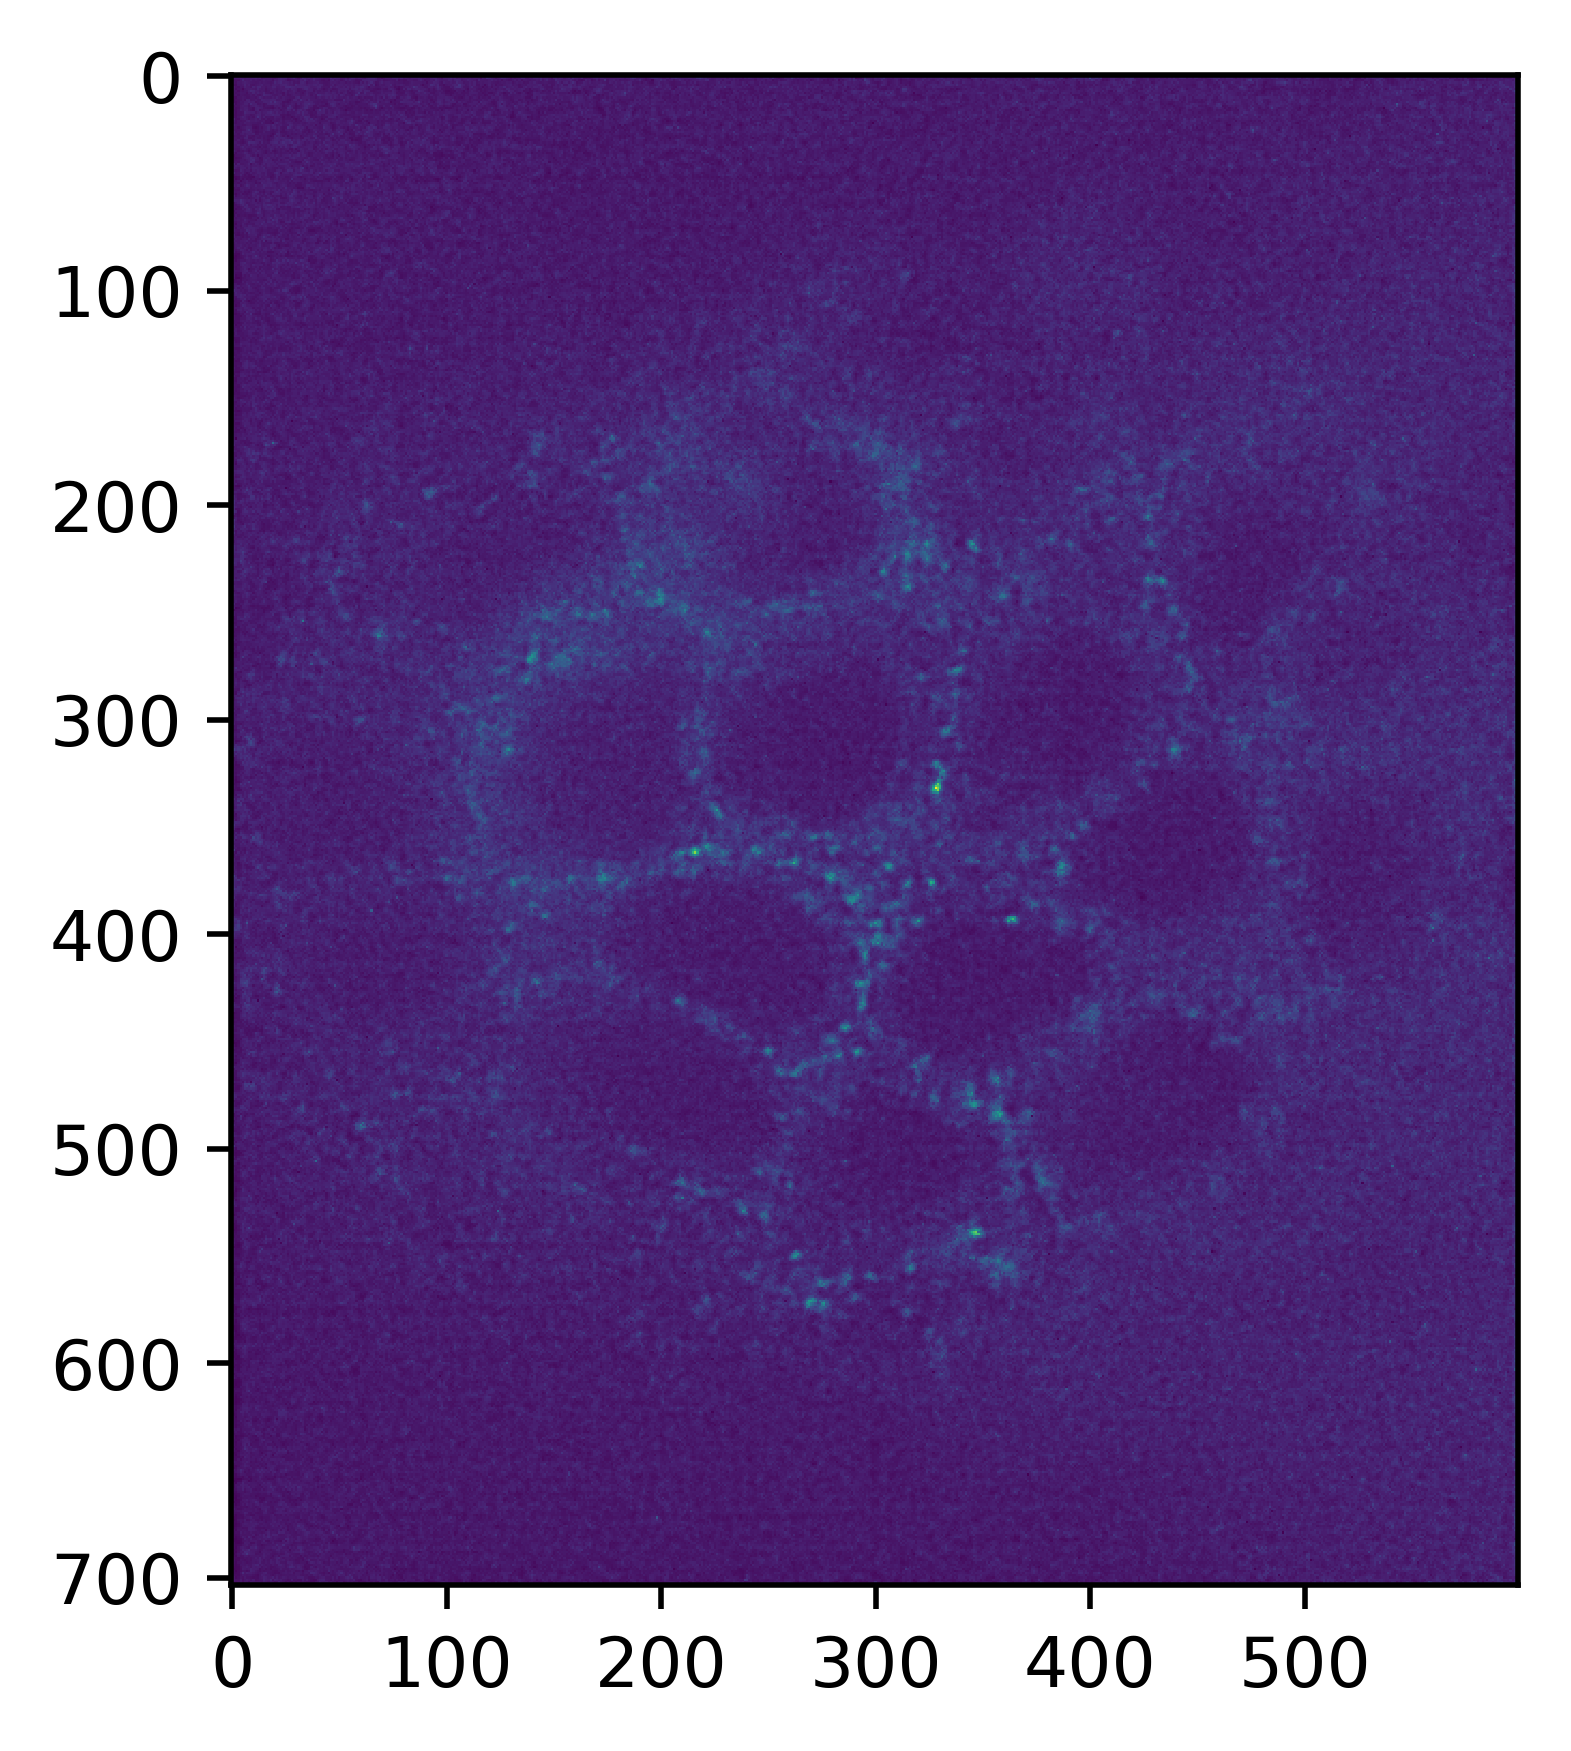

In [16]:
frameId = 0

frameId = 69

path = inputDataFolder+'/'+master_filesOfInterest[frameId]
print(path)
latticeMovieFrame = skimage.external.tifffile.imread(path)
latticeMovieFrame_shape = latticeMovieFrame.shape
print(latticeMovieFrame_shape)
plt.figure(dpi=500)
plt.imshow(latticeMovieFrame[50])

1453.33691675
1673.89


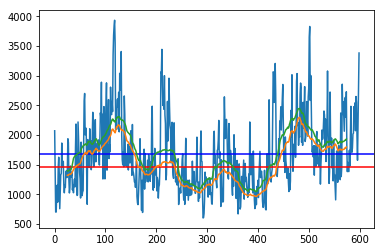

In [40]:
plt.plot(latticeMovieFrame[51][302])
from scipy import stats
array = np.array(latticeMovieFrame[50][300])
hmean = stats.hmean(array)
mean=np.average(array)
print(hmean)
print(mean)
plt.axhline(y=hmean, color='r', linestyle='-')
plt.axhline(y=mean, color='b', linestyle='-')

size=50
result=[]
for i in range(size,len(array)):
    subset = array[i-size:i]
    result.append(stats.hmean(subset))
x = np.array(range(size,len(array)))-size/2
plt.plot(x,result)

result =[]
for i in range(size,len(array)):
    subset = array[i-size:i]
    result.append(np.average(subset))
plt.plot(x,result)

/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0069_560nm_0392547msec_0090508648msecAbs_000x_000y_003z_0000t_decon.tif
(201, 704, 600)


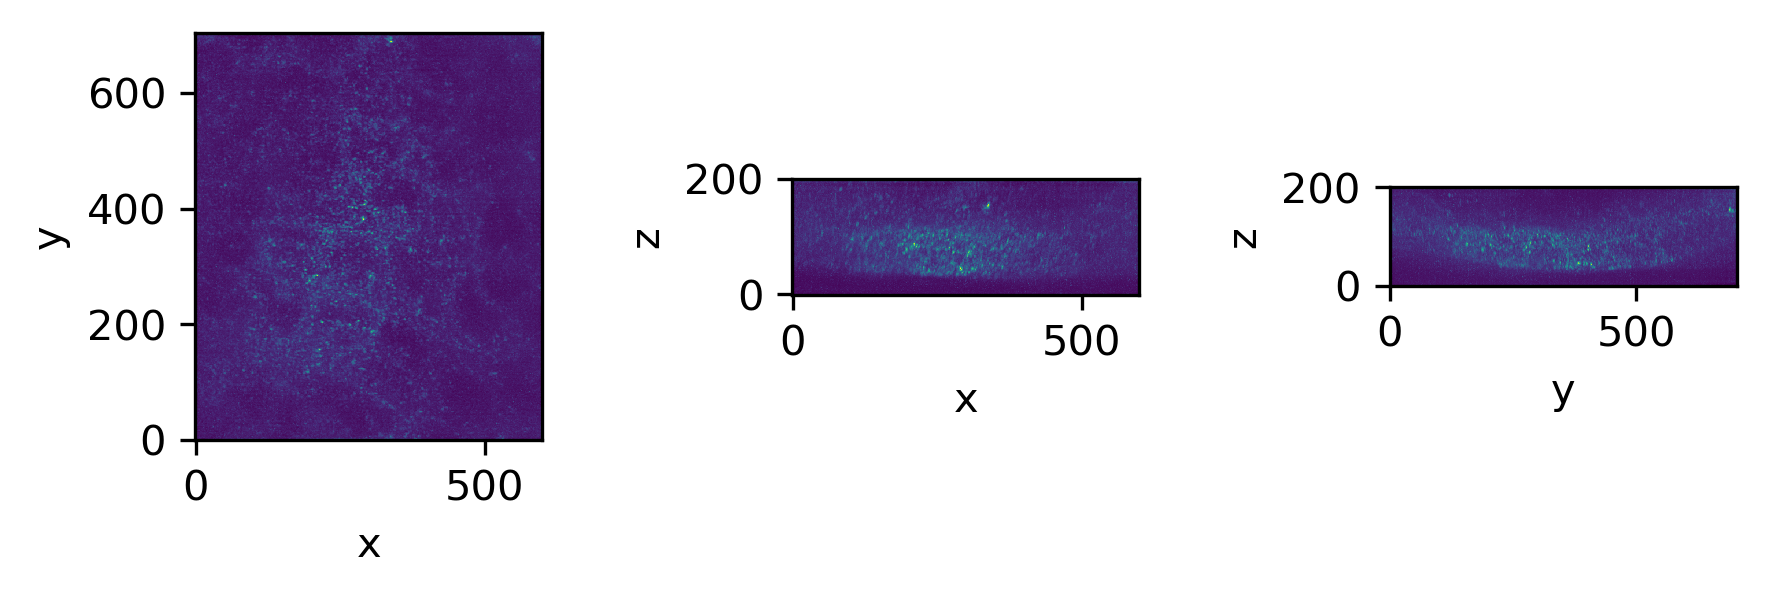

In [11]:
# read the image from where the detections come from


tiffproc.maxIntensityProjection(latticeMovieFrame)